In [1]:
import dolfin as df
import numpy as np
from matplotlib import pylab as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Example 1: Electrostatic potential due to a gaussian charge distribution

In [7]:
# Global parameters

Nx = 100           # Number of elements in x
Ny = 100           # Number of elements in y

# Define our discretization mesh as a unit square with Nx x Ny x 2 triangular elements
mesh = df.UnitSquareMesh(Nx,Ny)

# define the function space
# "Lagrange" or "CG" (Continuous Galerkin) of degree 1 are the simple 'hat functions'
V = df.FunctionSpace(mesh, "Lagrange", 1)

u0 = df.Constant(0.0) # define a constant parameter that will be used to set the edge boundary value
bc = df.DirichletBC(V, u0, "on_boundary") # set the Dirichlet boundary condition at the edges of box

# Use the Expression function to generate a sharp gaussian charge distribution centered in the box
f = df.Expression('exp(-((x[0]-0.5)*(x[0]-0.5) + (x[1]-0.5)*(x[1]-0.5) \
                   + (x[0]-0.5)*(x[0]-0.5)*(x[1]-0.5)*(x[1]-0.5))/0.0001)', degree=2)

# Trial, test, and solution functions for the potential
tu = df.TrialFunction(V)
v = df.TestFunction(V)
u = df.Function(V) # Function that will store the final result

a = df.inner(df.grad(tu), df.grad(v))*df.dx # bilinear form using the Fenics UFL syntax
L = f*v*df.dx # linear form

df.solve (a == L, u, bc) # assemble the components and solve the matrix equation with boundary conditions

file = df.File("poisson_gaussian_rect.pvd") # create a file to store the solution in ParaView format
file.write(u)

<IPython.core.display.Javascript object>


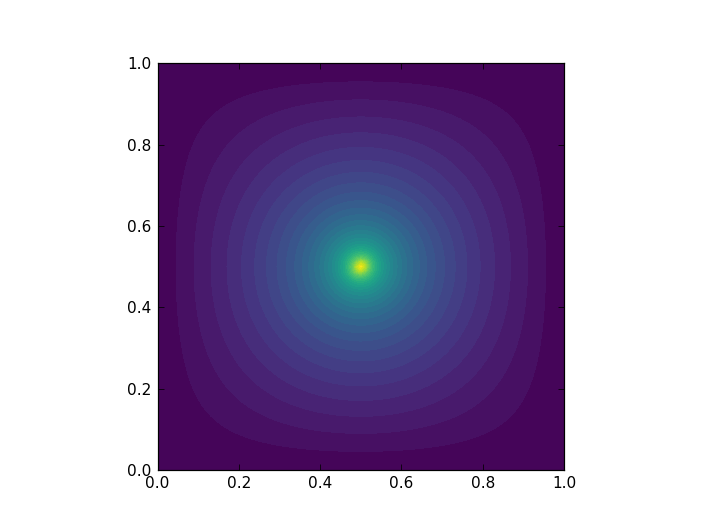

<IPython.core.display.Javascript object>


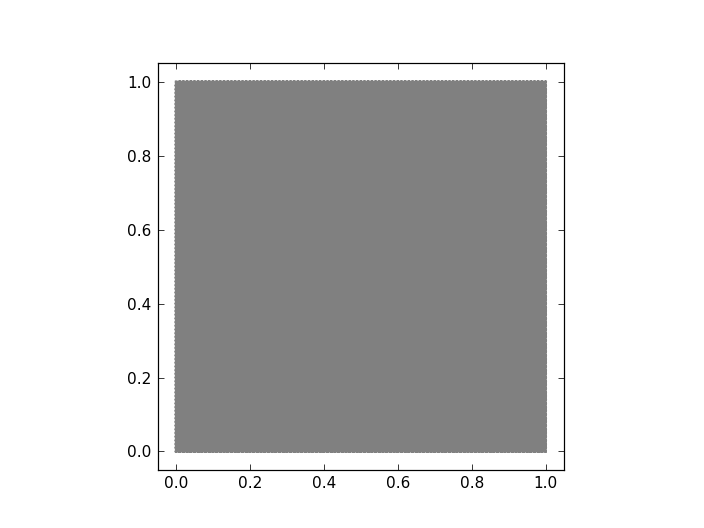

In [8]:
plt.figure()
df.plot(u) # Fenics generated plot using the matplotlib backend
plt.figure()
df.plot(mesh)

<IPython.core.display.Javascript object>


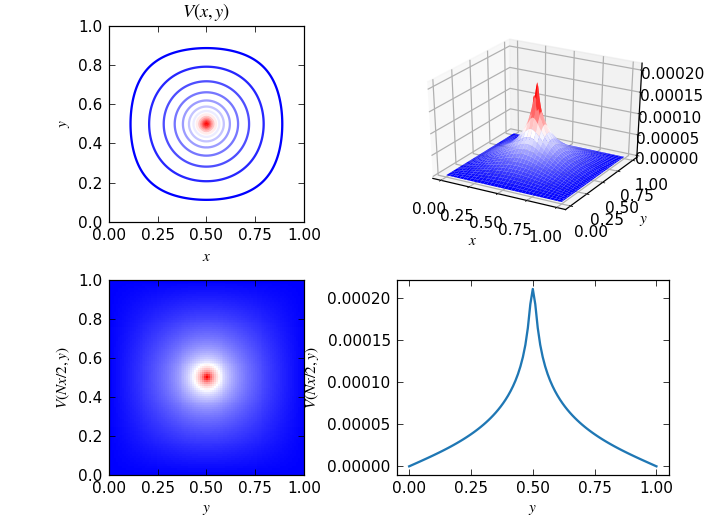

In [9]:
potential = u.compute_vertex_values() # extract the array of values with the solution
coords = mesh.coordinates() # extract the coordinates of the nodes
X = coords[:,0].reshape((Nx+1,Ny+1))
Y = coords[:,1].reshape((Nx+1,Ny+1))
potential = potential.reshape((Nx+1,Ny+1))

plt.figure()

# iso-contour plot
ax0 = plt.subplot(2,2,1)
ax0.set_aspect('equal')
#ax0.hlines(y=Py0, xmin=Px0, xmax=Px1, color='b', linestyle='dashed')
#ax0.hlines(y=Py1, xmin=Px0, xmax=Px1, color='r', linestyle='dashed')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_title(r'$V(x,y)$')
ax0.contour(X, Y, potential, locator=MaxNLocator(20), cmap='bwr')

# surface plot
ax1 = plt.subplot(2,2,2, projection='3d')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
#x = np.linspace(0, Nx, Nx, endpoint=False)
#y = np.linspace(0, Ny, Ny, endpoint=False)
#X, Y = np.meshgrid(x, y)
ax1.plot_surface(X, Y, potential, cmap='bwr')

# line plot
ax2 = plt.subplot(2,2,3)
ax2.set_aspect('equal')
ax2.pcolormesh(X, Y, potential, cmap='bwr')
ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$V(Nx/2,y)$')

# line plot
ax3 = plt.subplot(2,2,4)
#ax3.set_aspect('equal')
ax3.plot(Y[:,Ny//2], potential[:,Ny//2])
ax3.set_xlabel(r'$y$')
ax3.set_ylabel(r'$V(Nx/2,y)$')
plt.subplots_adjust(hspace=0.3, left=0.1, top=0.95, right=0.95, bottom=0.1)

## Circular mesh

In [10]:
Nr = 20
# Define our discretization mesh as a unit circle with Nr subdivisions in the radial direction,
# degree 1, and 2 dimensions
mesh = df.UnitDiscMesh.create(df.MPI.comm_world, Nr, 1, 2)

# define the function space
# "Lagrange" or "CG" (Continuous Galerkin) of degree 1 are the simple 'hat functions'
V = df.FunctionSpace(mesh, "Lagrange", 1)

u0 = df.Constant(0.0) # define a constant parameter that will be used to set the edge boundary value
bc = df.DirichletBC(V, u0, "on_boundary") # set the Dirichlet boundary condition at the edges of box

# Use the Expression function to generate a sharp gaussian charge distribution centered in the box
f = df.Expression('exp(-((x[0])*(x[0]) + (x[1])*(x[1]) \
                   + (x[0])*(x[0])*(x[1])*(x[1]))/0.001)', degree=2)

# Trial, test, and solution functions for the potential
tu = df.TrialFunction(V)
v = df.TestFunction(V)
u = df.Function(V)

a = df.inner(df.grad(tu), df.grad(v))*df.dx # bilinear form using the Fenics UFL syntax
L = f*v*df.dx # linear form
df.solve (a == L, u, bc) # assemble the components and solve the matrix equation with boundary conditions

file = df.File("poisson_gaussian_circ.pvd") # create a file to store the solution in ParaView format
file.write(u)

<IPython.core.display.Javascript object>


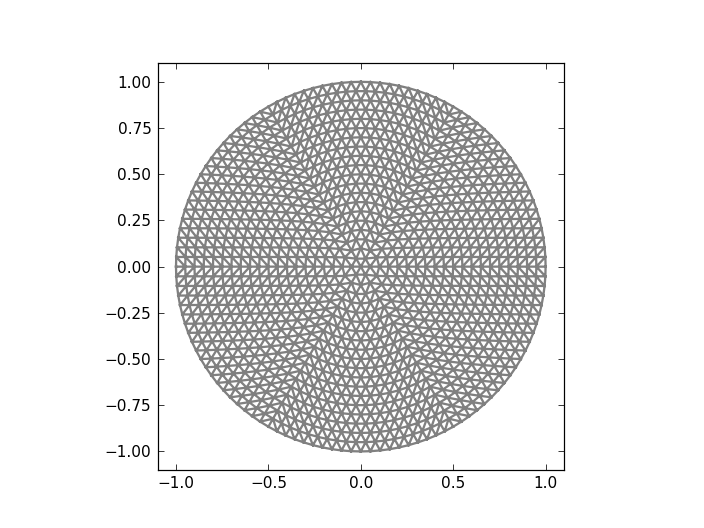

<IPython.core.display.Javascript object>


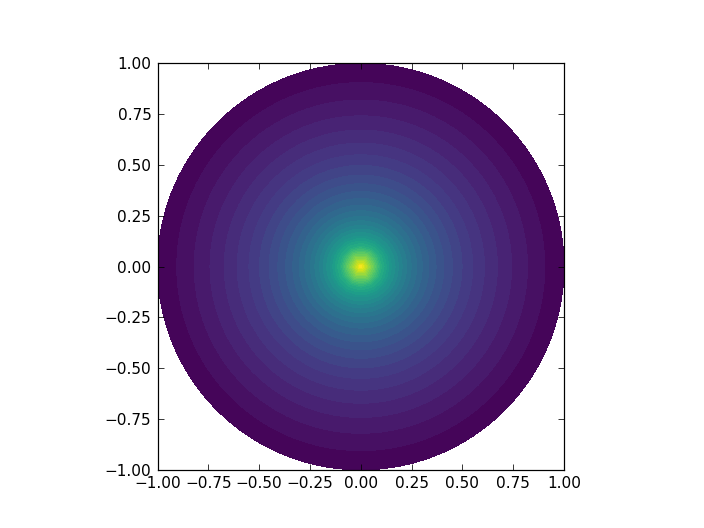

In [11]:
plt.figure()
df.plot(mesh)
plt.figure()
df.plot(u)

<IPython.core.display.Javascript object>


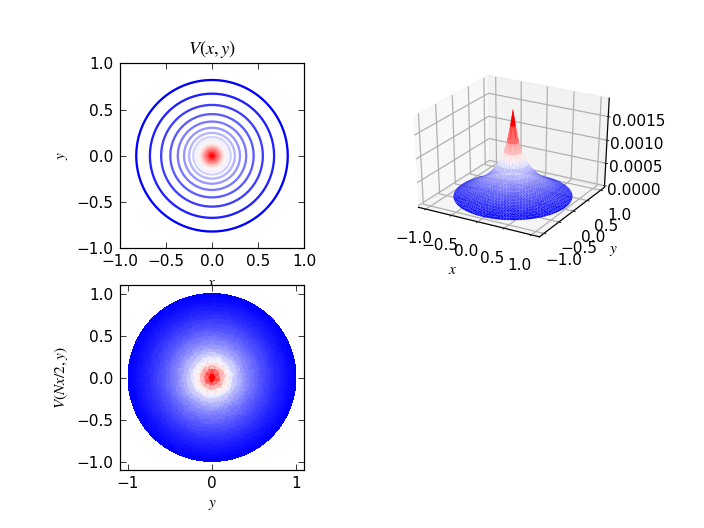

Text(0,0.5,'$V(Nx/2,y)$')

In [12]:
potential = u.compute_vertex_values() # extract the array of values with the solution
coords = mesh.coordinates() # extract the coordinates of the nodes
X = coords[:,0]
Y = coords[:,1]

plt.figure()

# iso-contour plot
ax0 = plt.subplot(2,2,1)
ax0.set_aspect('equal')
#ax0.hlines(y=Py0, xmin=Px0, xmax=Px1, color='b', linestyle='dashed')
#ax0.hlines(y=Py1, xmin=Px0, xmax=Px1, color='r', linestyle='dashed')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_title(r'$V(x,y)$')
ax0.tricontour(X, Y, potential, locator=MaxNLocator(20), cmap='bwr')

# surface plot
ax1 = plt.subplot(2,2,2, projection='3d')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
#x = np.linspace(0, Nx, Nx, endpoint=False)
#y = np.linspace(0, Ny, Ny, endpoint=False)
#X, Y = np.meshgrid(x, y)
ax1.plot_trisurf(X, Y, potential, cmap='bwr')

# line plot
ax2 = plt.subplot(2,2,3)
ax2.set_aspect('equal')
ax2.tripcolor(X, Y, potential, cmap='bwr')
ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$V(Nx/2,y)$')

## Example 2: The infinite parallel plate capacitor

In [13]:
# Global parameters

Lx = 80            # Physical length of box in x
Ly = 80            # Physical length of box in y
Nx = 200           # Number of elements in x
Ny = 200           # Number of elements in y

# Define our discretization mesh setting the physical extents of the problem an number of elements
mesh = df.RectangleMesh.create(df.MPI.comm_world, [df.Point(0,0), df.Point(Lx,Ly)], [Nx,Ny], \
                               df.CellType.Type.quadrilateral)

# define the function space
# "Lagrange" or "CG" (Continuous Galerkin) of degree 1 are the simple 'hat functions'
V = df.FunctionSpace(mesh, "Lagrange", 1)

# Function that defines the top plate of the capacitor as a boundary
def TopPlate(x, on_boundary):
    return df.near(x[1], Ly) and on_boundary

# Function that defines the top plate of the capacitor as a boundary
def BottomPlate(x, on_boundary):
    return df.near(x[1], 0) and on_boundary

u0 = df.Constant(0.0)
u_T = df.Constant(1.0)
u_B = df.Constant(-1.0)
bc_top = df.DirichletBC(V, u_T, TopPlate)
bc_bottom = df.DirichletBC(V, u_B, BottomPlate)

bcs = [bc_top, bc_bottom] # bring together all the boundary conditions

# Trial, test, and solution functions for the potential
tu = df.TrialFunction(V)
v = df.TestFunction(V)
u = df.Function(V)

a = df.inner(df.grad(tu), df.grad(v))*df.dx # bilinear form using the Fenics UFL syntax
L = u0*v*df.dx # linear form
df.solve (a == L, u, bcs) # assemble the components and solve the matrix equation with boundary conditions

file = df.File("poisson_infinite_cap.pvd") # create a file to store the solution in ParaView format
file.write(u)

<IPython.core.display.Javascript object>


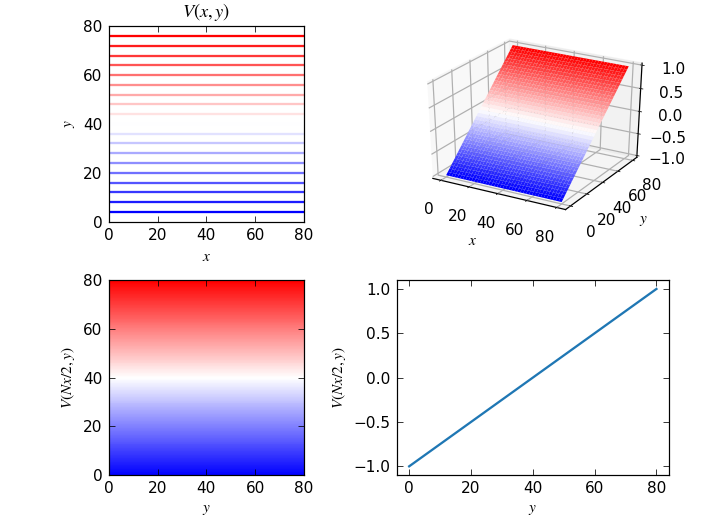

In [14]:
potential = u.compute_vertex_values() # extract the array of values with the solution
coords = mesh.coordinates() # extract the coordinates of the nodes
X = coords[:,0].reshape((Nx+1,Ny+1))
Y = coords[:,1].reshape((Nx+1,Ny+1))
potential = potential.reshape((Nx+1,Ny+1))

plt.figure()

# iso-contour plot
ax0 = plt.subplot(2,2,1)
ax0.set_aspect('equal')
#ax0.hlines(y=Py0, xmin=Px0, xmax=Px1, color='b', linestyle='dashed')
#ax0.hlines(y=Py1, xmin=Px0, xmax=Px1, color='r', linestyle='dashed')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_title(r'$V(x,y)$')
ax0.contour(X, Y, potential, locator=MaxNLocator(20), cmap='bwr')

# surface plot
ax1 = plt.subplot(2,2,2, projection='3d')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
#x = np.linspace(0, Nx, Nx, endpoint=False)
#y = np.linspace(0, Ny, Ny, endpoint=False)
#X, Y = np.meshgrid(x, y)
ax1.plot_surface(X, Y, potential, cmap='bwr')

# line plot
ax2 = plt.subplot(2,2,3)
ax2.set_aspect('equal')
ax2.pcolormesh(X, Y, potential, cmap='bwr')
ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$V(Nx/2,y)$')

# line plot
ax3 = plt.subplot(2,2,4)
#ax3.set_aspect('equal')
ax3.plot(Y[:,Ny//2], potential[:,Ny//2])
ax3.set_xlabel(r'$y$')
ax3.set_ylabel(r'$V(Nx/2,y)$')
plt.subplots_adjust(hspace=0.3, left=0.1, top=0.95, right=0.95, bottom=0.1)

## Example 3: Finite parallel plate capacitor


In [15]:
# Global parameters

Lx = 80            # Physical length of box in x
Ly = 80            # Physical length of box in y
Nx = 200           # Number of elements in x
Ny = 200           # Number of elements in y
Pl = 40            # Length of parallel plate
d = 20             # Distance between plates
Py0 = Ly/2 - d/2
Py1 = Ly/2 + d/2
Px0 = Lx/2 - Pl/2
Px1 = Ly/2 + Pl/2

# Define our discretization mesh setting the physical extents of the problem an number of elements
mesh = df.RectangleMesh.create(df.MPI.comm_world, [df.Point(0,0), df.Point(Lx,Ly)], [Nx,Ny], \
                               df.CellType.Type.quadrilateral)
# define the function space
# "Lagrange" or "CG" (Continuous Galerkin) of degree 1 are the simple 'hat functions'
V = df.FunctionSpace(mesh, "Lagrange", 1) 

u0 = df.Constant(0.0) # define a constant parameter that will be used to set the edge boundary value
bc_outer = df.DirichletBC(V, u0, "on_boundary") # set the Dirichlet boundary condition at the edges of box

# Function that defines the top plate of the capacitor as a boundary
def TopPlate(x):
    return df.near(x[1], Py1) and x[0] >= Px0 and x[0] <= Px1

# Function that defines the top plate of the capacitor as a boundary
def BottomPlate(x):
    return df.near(x[1], Py0) and x[0] >= Px0 and x[0] <= Px1

u_T = df.Constant(1.0)
u_B = df.Constant(-1.0)
bc_top = df.DirichletBC(V, u_T, TopPlate)
bc_bottom = df.DirichletBC(V, u_B, BottomPlate)

bcs = [bc_outer, bc_top, bc_bottom] # bring together all the boundary conditions

# Trial, test, and solution functions for the potential
tu = df.TrialFunction(V)
v = df.TestFunction(V)
u = df.Function(V)

a = df.inner(df.grad(tu), df.grad(v))*df.dx # bilinear form using the Fenics UFL syntax
L = u0*v*df.dx # linear form
df.solve (a == L, u, bcs) # assemble the components and solve the matrix equation with boundary conditions

file = df.File("poisson_finite_cap.pvd") # create a file to store the solution in ParaView format
file.write(u)

<IPython.core.display.Javascript object>


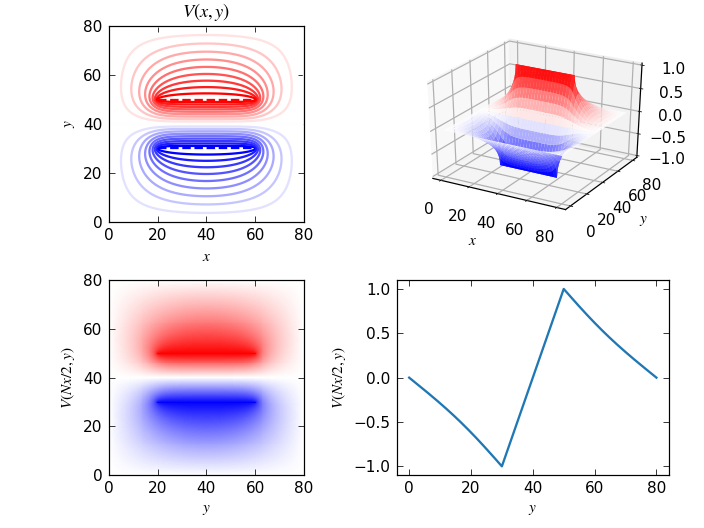

In [16]:
potential = u.compute_vertex_values() # extract the array of values with the solution
coords = mesh.coordinates() # extract the coordinates of the nodes
X = coords[:,0].reshape((Nx+1,Ny+1))
Y = coords[:,1].reshape((Nx+1,Ny+1))
potential = potential.reshape((Nx+1,Ny+1))

plt.figure()

# iso-contour plot
ax0 = plt.subplot(2,2,1)
ax0.set_aspect('equal')
ax0.hlines(y=Py0, xmin=Px0, xmax=Px1, color='b', linestyle='dashed')
ax0.hlines(y=Py1, xmin=Px0, xmax=Px1, color='r', linestyle='dashed')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_title(r'$V(x,y)$')
ax0.contour(X, Y, potential, locator=MaxNLocator(20), cmap='bwr')

# surface plot
ax1 = plt.subplot(2,2,2, projection='3d')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
#x = np.linspace(0, Nx, Nx, endpoint=False)
#y = np.linspace(0, Ny, Ny, endpoint=False)
#X, Y = np.meshgrid(x, y)
ax1.plot_surface(X, Y, potential, cmap='bwr')

# line plot
ax2 = plt.subplot(2,2,3)
ax2.set_aspect('equal')
ax2.pcolormesh(X, Y, potential, cmap='bwr')
ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$V(Nx/2,y)$')

# line plot
ax3 = plt.subplot(2,2,4)
#ax3.set_aspect('equal')
ax3.plot(Y[:,Ny//2], potential[:,Ny//2])
ax3.set_xlabel(r'$y$')
ax3.set_ylabel(r'$V(Nx/2,y)$')
plt.subplots_adjust(hspace=0.3, left=0.1, top=0.95, right=0.95, bottom=0.1)

## Computing the electric field from the calculated potential

In [17]:
# Global parameters

Lx = 80            # Physical length of box in x
Ly = 80            # Physical length of box in y
Nx = 200           # Number of elements in x
Ny = 200           # Number of elements in y
Pl = 40            # Length of parallel plate
d = 20             # Distance between plates
Py0 = Ly/2 - d/2
Py1 = Ly/2 + d/2
Px0 = Lx/2 - Pl/2
Px1 = Ly/2 + Pl/2

# Define our discretization mesh setting the physical extents of the problem an number of elements
mesh = df.RectangleMesh.create(df.MPI.comm_world, [df.Point(0,0), df.Point(Lx,Ly)], [Nx,Ny], \
                               df.CellType.Type.quadrilateral)
# define the function space
# "Lagrange" or "CG" (Continuous Galerkin) of degree 1 are the simple 'hat functions'
V = df.FunctionSpace(mesh, "Lagrange", 1) 
VE = df.VectorFunctionSpace(mesh, "Lagrange", 1)

u0 = df.Constant(0.0) # define a constant parameter that will be used to set the edge boundary value
bc_outer = df.DirichletBC(V, u0, "on_boundary") # set the Dirichlet boundary condition at the edges of box

# Function that defines the top plate of the capacitor as a boundary
def TopPlate(x):
    return df.near(x[1], Py1) and x[0] >= Px0 and x[0] <= Px1

# Function that defines the top plate of the capacitor as a boundary
def BottomPlate(x):
    return df.near(x[1], Py0) and x[0] >= Px0 and x[0] <= Px1

u_T = df.Constant(1.0)
u_B = df.Constant(-1.0)
bc_top = df.DirichletBC(V, u_T, TopPlate)
bc_bottom = df.DirichletBC(V, u_B, BottomPlate)

bcs = [bc_outer, bc_top, bc_bottom] # bring together all the boundary conditions

# Trial, test, and solution functions for the potential
tu = df.TrialFunction(V)
v = df.TestFunction(V)
u = df.Function(V) # Function that will store the final result

au = df.inner(df.grad(tu), df.grad(v))*df.dx # bilinear form using the Fenics UFL syntax
Lu = u0*v*df.dx # linear form
df.solve(au == Lu, u, bcs) # assemble the components and solve the matrix equation with boundary conditions

# Trial, test, and solution functions for the electric field
tE = df.TrialFunction(VE)
q = df.TestFunction(VE)
E = df.Function(VE)

aE = df.inner(tE, q)*df.dx # bilinear form for E field equation
LE = df.inner(-df.grad(u), q)*df.dx  # linear for for E field equation, note that U has already been computed!!
df.solve(aE == LE, E)

file = df.File("poisson_finite_cap.pvd") # create a file to store the solution in ParaView format
file.write(u)
file2 = df.File("poisson_finite_cap_Efield.pvd") # create a file to store the solution in ParaView format
file2.write(u)

<IPython.core.display.Javascript object>


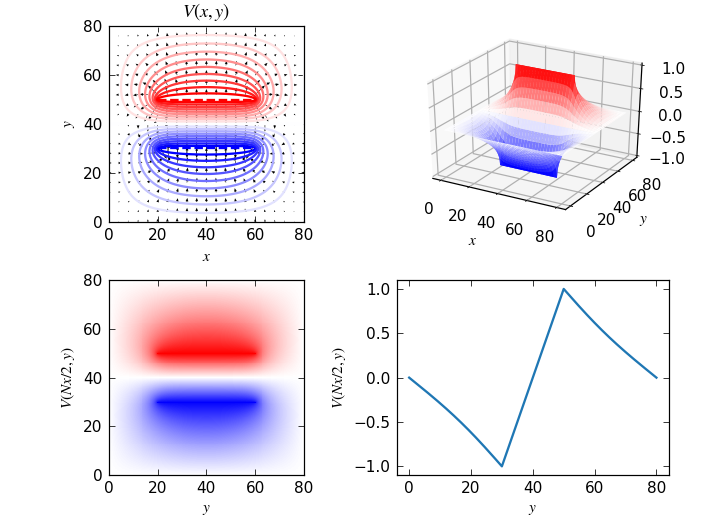

In [18]:
potential = u.compute_vertex_values() # extract the array of values with the solution
Efield = E.compute_vertex_values()
coords = mesh.coordinates() # extract the coordinates of the nodes
X = coords[:,0].reshape((Nx+1,Ny+1))
Y = coords[:,1].reshape((Nx+1,Ny+1))
potential = potential.reshape((Nx+1,Ny+1))
Efield = Efield.reshape((2,Nx+1,Ny+1))

plt.figure()

# iso-contour plot
ax0 = plt.subplot(2,2,1)
ax0.set_aspect('equal')
ax0.hlines(y=Py0, xmin=Px0, xmax=Px1, color='b', linestyle='dashed')
ax0.hlines(y=Py1, xmin=Px0, xmax=Px1, color='r', linestyle='dashed')
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.set_title(r'$V(x,y)$')
ax0.contour(X, Y, potential, locator=MaxNLocator(20), cmap='bwr')
s = 10
ax0.quiver(X[::s,::s], Y[::s,::s], Efield[0,::s,::s], Efield[1,::s,::s], headwidth=5, headlength=6, headaxislength=6)

# surface plot
ax1 = plt.subplot(2,2,2, projection='3d')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
#x = np.linspace(0, Nx, Nx, endpoint=False)
#y = np.linspace(0, Ny, Ny, endpoint=False)
#X, Y = np.meshgrid(x, y)
ax1.plot_surface(X, Y, potential, cmap='bwr')

# line plot
ax2 = plt.subplot(2,2,3)
ax2.set_aspect('equal')
ax2.pcolormesh(X, Y, potential, cmap='bwr')
ax2.set_xlabel(r'$y$')
ax2.set_ylabel(r'$V(Nx/2,y)$')

# line plot
ax3 = plt.subplot(2,2,4)
#ax3.set_aspect('equal')
ax3.plot(Y[:,Ny//2], potential[:,Ny//2])
ax3.set_xlabel(r'$y$')
ax3.set_ylabel(r'$V(Nx/2,y)$')
plt.subplots_adjust(hspace=0.3, left=0.1, top=0.95, right=0.95, bottom=0.1)